In [34]:
# GET PARAMETERS
import os 
import sys
import pandas as pd
import numpy as np
# Get Parent folder : 
current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path, '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

print('Current working directory: ',os.getcwd())

Current working directory:  /home/rrochas/prediction-validation/jupyter_ipynb


In [13]:
globals()[f"df_{model_name}"]

,mae,rmse,mape,mase
10,40.660580,54.649572,26.634565,2.558653
15,35.371171,46.860531,27.670588,2.226301
25,27.742186,39.739950,20.123101,1.746012
35,27.918144,38.342598,20.842705,1.757085
50,35.947924,47.340305,27.280834,2.262617
75,37.290010,49.990476,25.522928,2.346833
80,38.773284,49.871380,27.094638,2.439739
85,35.667313,47.208276,26.284945,2.244984
90,33.356339,47.047179,21.118972,2.099511
95,28.305063,42.510339,17.429679,1.781500


In [12]:
globals()[f"{model_name}_{metric}_list_h12"]

[3.4769833087921143,
 3.13219690322876,
 2.3742775917053223,
 2.335200548171997,
 3.163193464279175,
 3.3696305751800537,
 3.5507638454437256,
 3.198956251144409,
 2.9526493549346924,
 2.421716690063477,
 0.9294255971908568]

In [32]:
metrics = ['mae','rmse','mape','mase']
for model_name in ['STGCN','STAEformer']:
    for metric in metrics:
        globals()[f"{model_name}_{metric}_list"] = []
        globals()[f"{model_name}_{metric}_list_h1"] = []
        globals()[f"{model_name}_{metric}_list_h6"] = []
        globals()[f"{model_name}_{metric}_list_h12"] = []


percentage_list = [50,75,80,85,90,95,100]# [10,15,25,35,50,75,80,85,90,95,100]
for model_name in ['STGCN','STAEformer']:
    # build list of metrics for each percentage
    for p in percentage_list:
        folder_path = os.path.join(f'../save/K_fold_validation/training_wo_HP_tuning/comparison_accuracy_per_size_{model_name}',f'PeMS08_flow_{p}p')
        results = pd.read_csv(f'{folder_path}/METRICS_PeMS08_flow_{p}p.csv',index_col = 0)
        for metric in metrics:
            selected_columns = [c for c in results.columns if (c.startswith(metric)) and not 'complete' in c]
            metric_all = results[selected_columns].mean(axis=1)['test']
            globals()[f"{model_name}_{metric}_list"].append(metric_all)
            globals()[f"{model_name}_{metric}_list_h1"].append(results[selected_columns][f"{metric}_h1"]['test'])
            globals()[f"{model_name}_{metric}_list_h6"].append(results[selected_columns][f"{metric}_h6"]['test'])
            globals()[f"{model_name}_{metric}_list_h12"].append(results[selected_columns][f"{metric}_h12"]['test'])


    # ...
    
    globals()[f"df_{model_name}"] = pd.DataFrame({metric: globals()[f"{model_name}_{metric}_list"] for metric in metrics})
    globals()[f"df_{model_name}_h1"] = pd.DataFrame({metric: globals()[f"{model_name}_{metric}_list_h1"] for metric in metrics})
    globals()[f"df_{model_name}_h6"] = pd.DataFrame({metric: globals()[f"{model_name}_{metric}_list_h6"] for metric in metrics})
    globals()[f"df_{model_name}_h12"] = pd.DataFrame({metric: globals()[f"{model_name}_{metric}_list_h12"] for metric in metrics})

    globals()[f"df_{model_name}"].index = percentage_list
    globals()[f"df_{model_name}_h1"].index = percentage_list
    globals()[f"df_{model_name}_h6"].index = percentage_list
    globals()[f"df_{model_name}_h12"].index = percentage_list

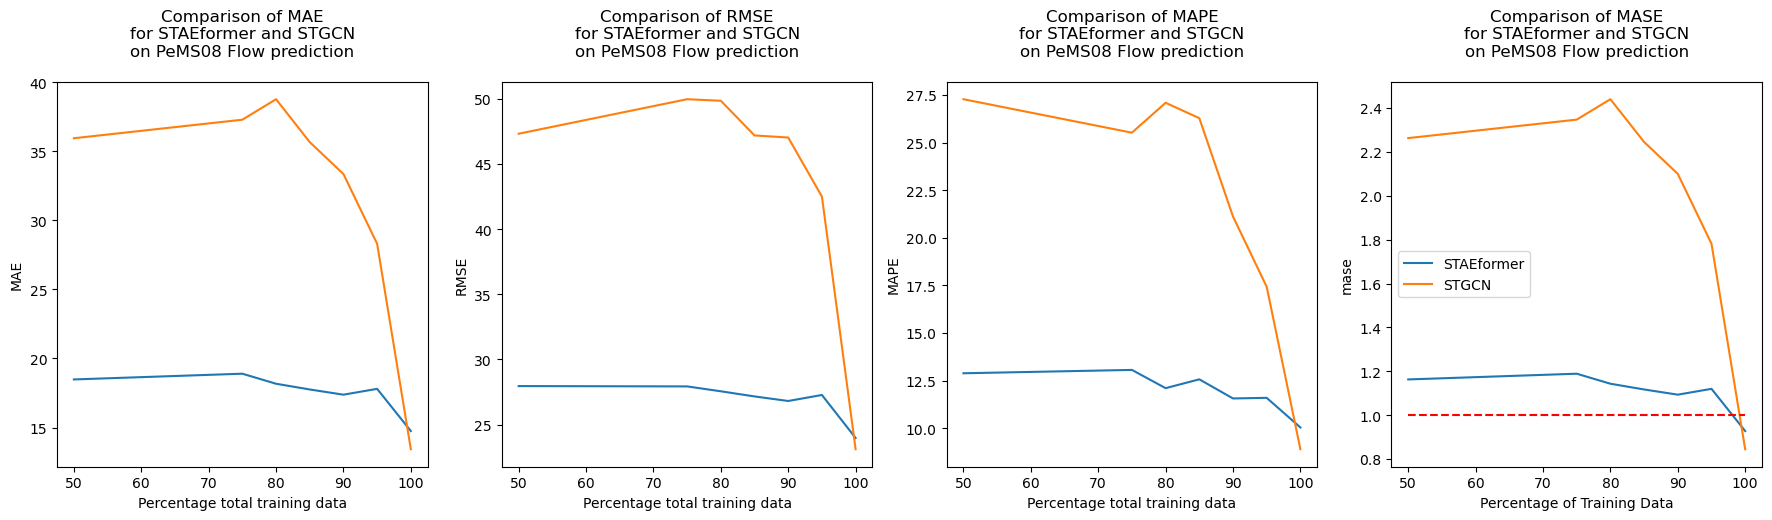

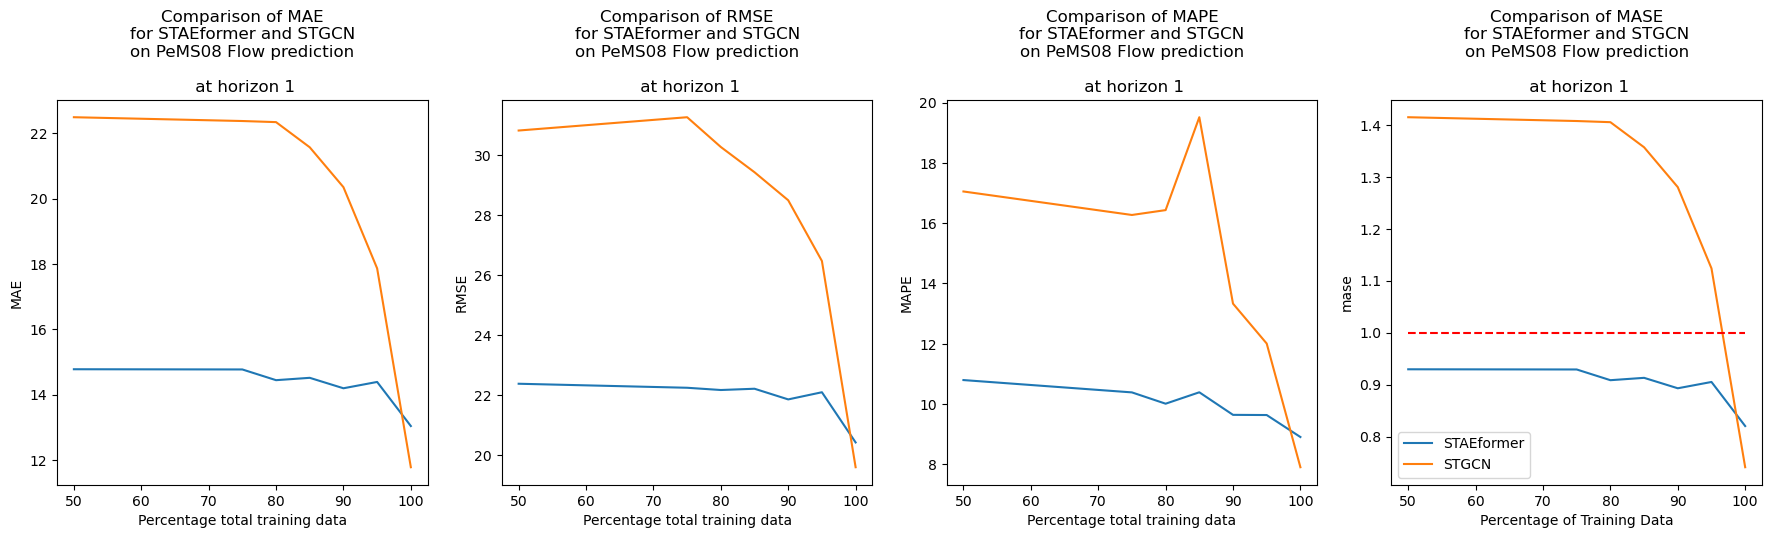

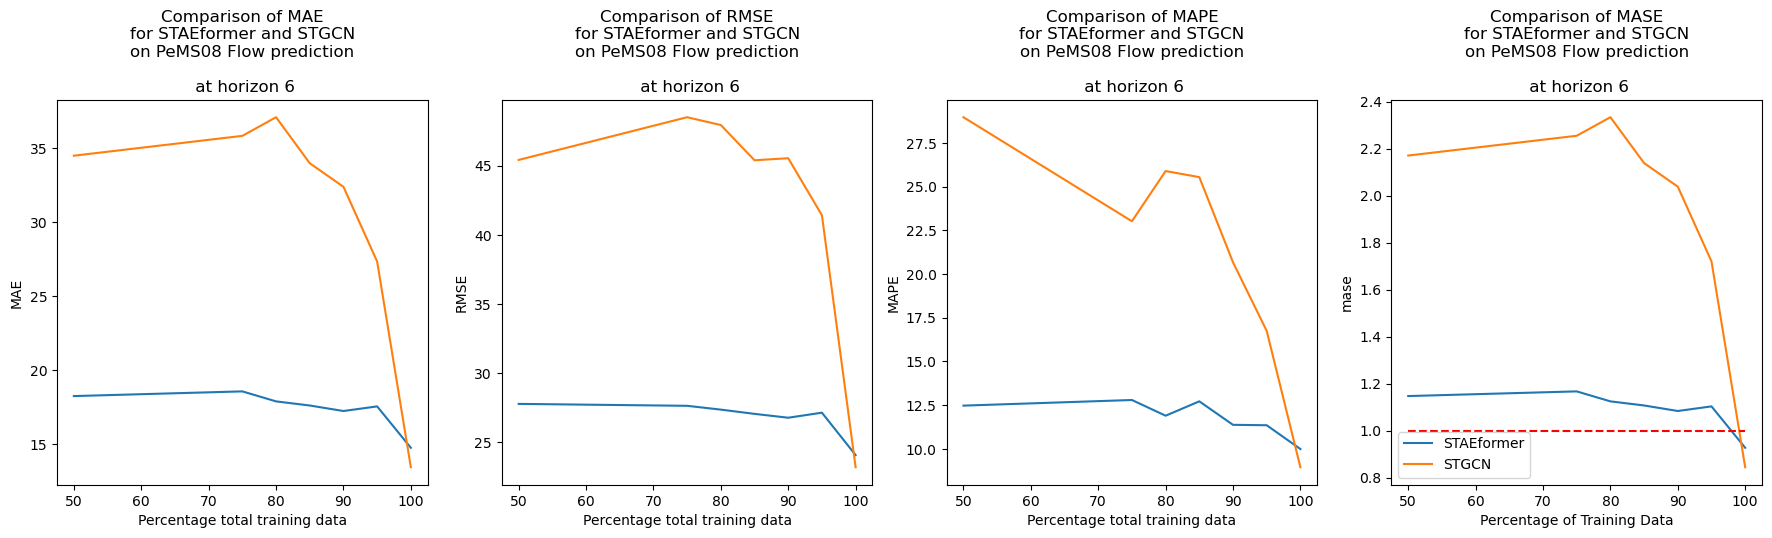

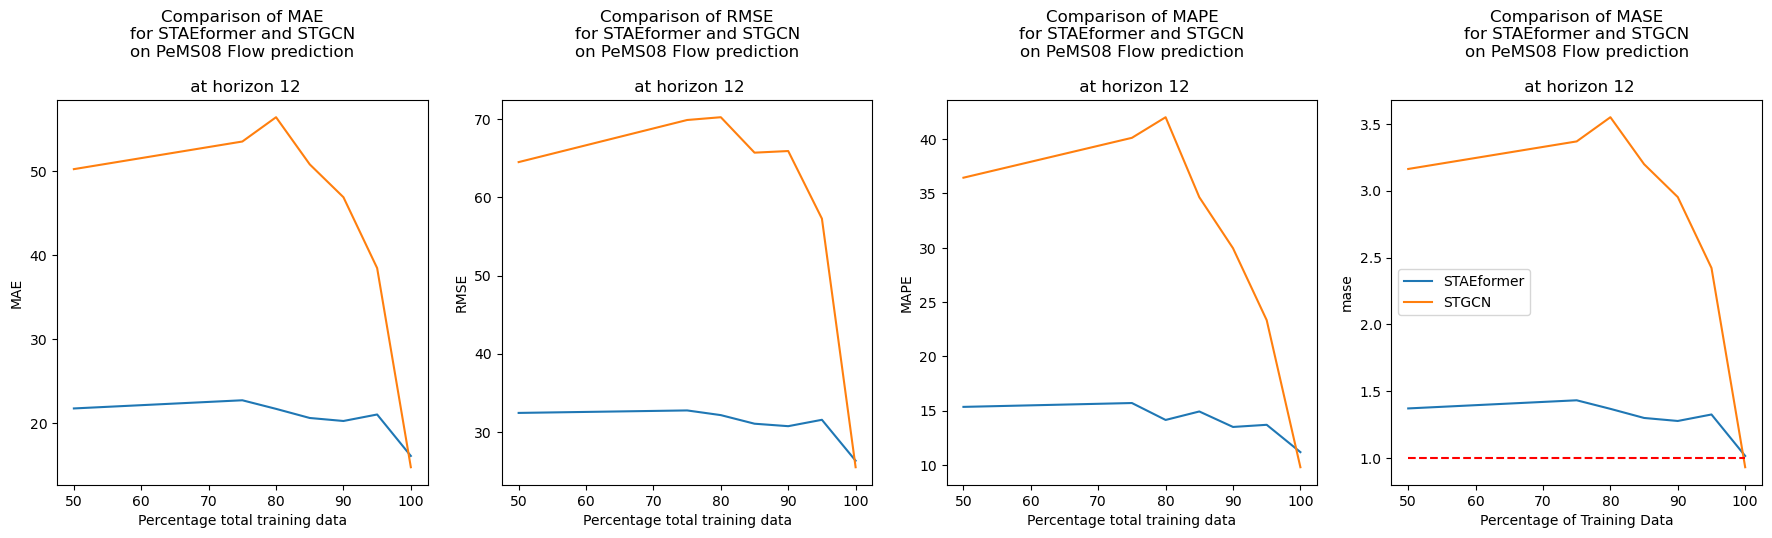

In [35]:
import matplotlib.pyplot as plt

for horizon in ['','_h1','_h6','_h12']:
    fig, axes = plt.subplots(1,len(metrics),figsize=(22, 5))
    for k,metric in enumerate(metrics): 
        for model_name in ['STGCN','STAEformer']:
            axes[k].plot(globals()[f"df_{model_name}{horizon}"][metric].index,globals()[f"df_{model_name}{horizon}"][metric])
        title = f'Comparison of {metric.upper()}\nfor STAEformer and STGCN\non PeMS08 Flow prediction\n'
        if horizon != '':
            title = f"{title}\n at horizon {horizon[2:]}"
        axes[k].set_title(title)
        axes[k].set_xlabel('Percentage total training data')
        axes[k].set_ylabel(metric.upper())
        #plt.xticks(range(len(percentage_list)), percentage_list)
        plt.ylabel(metric)
        plt.xlabel('Percentage of Training Data')
        plt.legend(['STAEformer', 'STGCN'])
        if metric == 'mase':
            axes[k].plot([np.min(np.array(percentage_list)), 100], [1, 1], color='red', linestyle='--', label='MASE = 1')
    plt.show()